In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot
import numpy

**Task 1**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

**Task 2**

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

**Task 3**

In [ ]:
model = keras.Sequential([
    # Convolutional layers
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16, (3,3), activation='relu'),
    # Dense layers
    layers.Flatten(),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

**Task 4**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Task 5**

In [19]:
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5848 - accuracy: 0.4368 - val_loss: 1.3443 - val_accuracy: 0.5266
Epoch 2/3
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2808 - accuracy: 0.5462 - val_loss: 1.2494 - val_accuracy: 0.5555
Epoch 3/3
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1613 - accuracy: 0.5913 - val_loss: 1.1718 - val_accuracy: 0.5883


**Task 6**

In [20]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 10ms/step - loss: 1.1718 - accuracy: 0.5883
Test accuracy: 0.5882999897003174


1/1 [==============================] - 0s 27ms/step


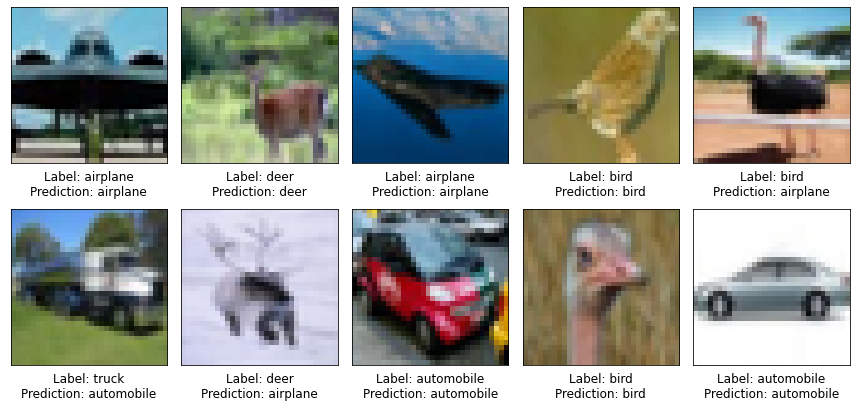

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select how many images to show
num_images = 10
indices = numpy.random.choice(x_test.shape[0], num_images, replace=False)
images = x_test[indices]
labels = y_test[indices]

predictions = model.predict(images)

# Plot the images and predictions
fig, axes = matplotlib.pyplot.subplots(nrows=2, ncols=num_images // 2, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    # Plot the image
    ax.imshow(images[i])
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Show the true label and predicted label for the image
    true_label = class_names[labels[i][0]]
    pred_label = class_names[numpy.argmax(predictions[i])]
    ax.set_xlabel(f'Label: {true_label}\nPrediction: {pred_label}', fontsize=12)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()